In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

In [4]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

 97% 414M/428M [00:02<00:00, 164MB/s]
100% 428M/428M [00:02<00:00, 188MB/s]


In [5]:
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [6]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/resampy/interpn.py:114: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  _resample_loop_p(x, t_out, interp_win, interp_delta, num_table, scale, y)


### Load the Dataset

In [7]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is Loaded')

Dataset is Loaded


In [9]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [10]:
# create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,fear
1,/content/tess toronto emotional speech set dat...,fear
2,/content/tess toronto emotional speech set dat...,fear
3,/content/tess toronto emotional speech set dat...,fear
4,/content/tess toronto emotional speech set dat...,fear


In [11]:
df['label'].value_counts()

fear       400
sad        400
neutral    400
happy      400
disgust    400
angry      400
ps         400
Name: label, dtype: int64

### Exploratory Data Analysis

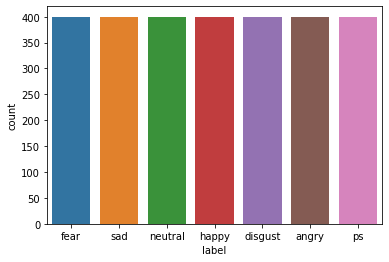

In [12]:
sns.countplot(df['label'])

In [13]:
def waveplot(data, sr, emotion):
    plt.figure(figsize= (10,4))
    plt.title(emotion, size = 20)
    librosa.display.waveplot(data, sr= sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size = 20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

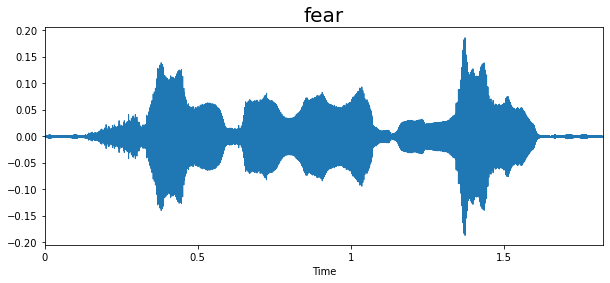

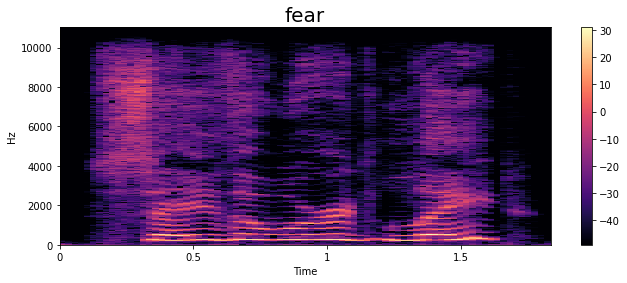

In [19]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

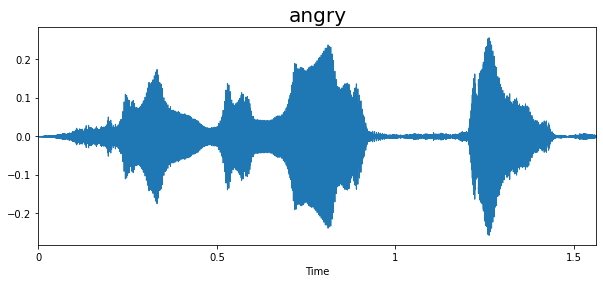

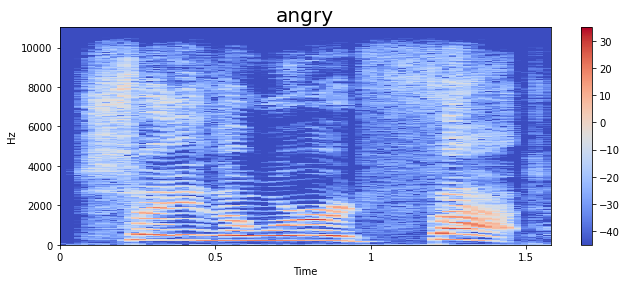

In [20]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

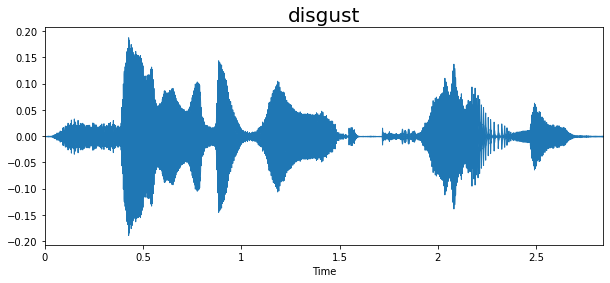

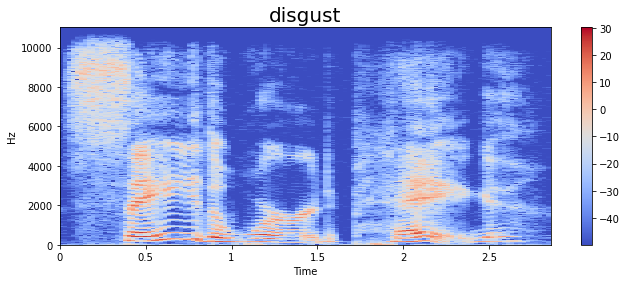

In [21]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

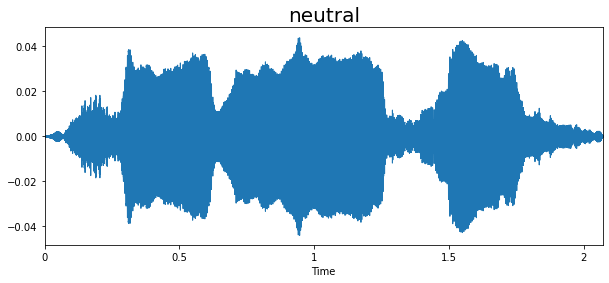

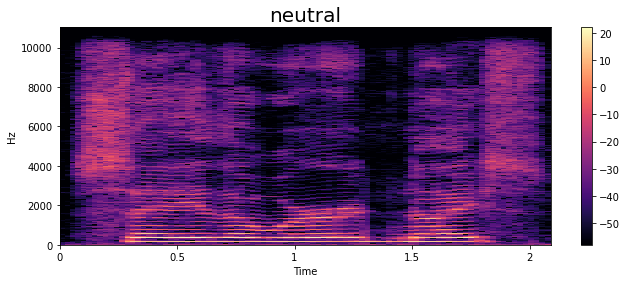

In [22]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

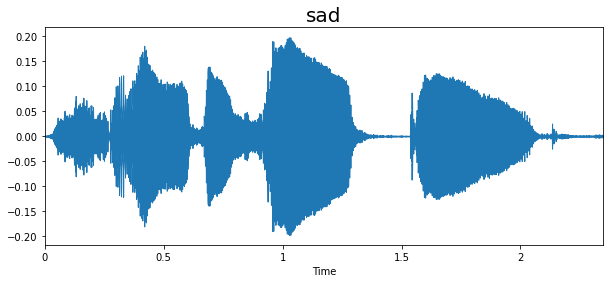

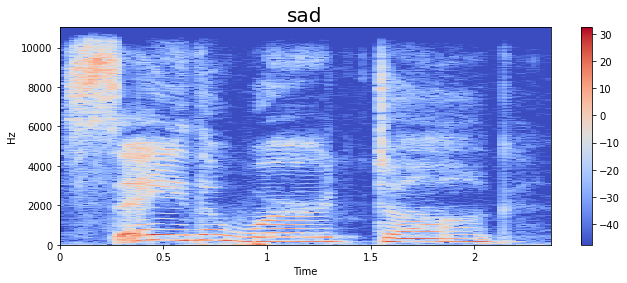

In [23]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

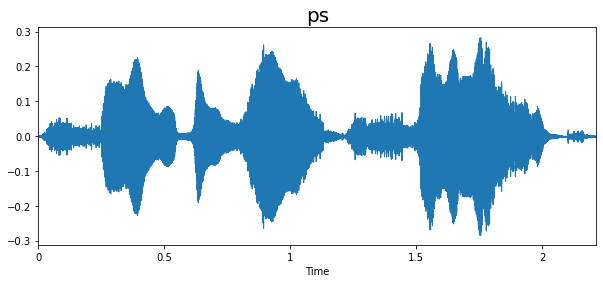

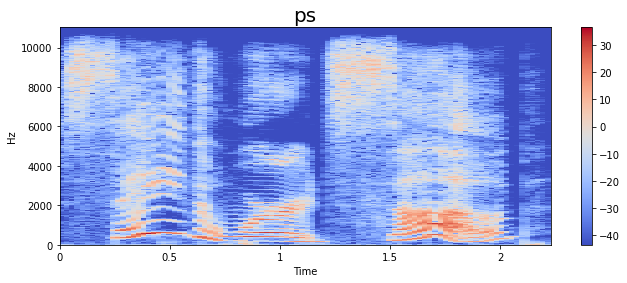

In [24]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

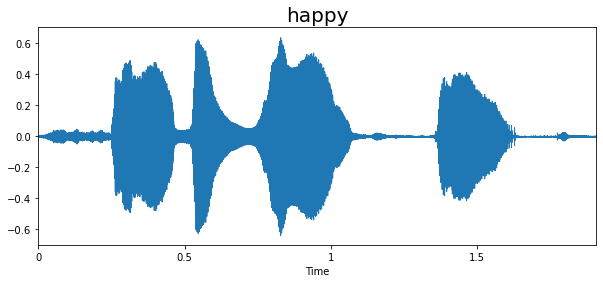

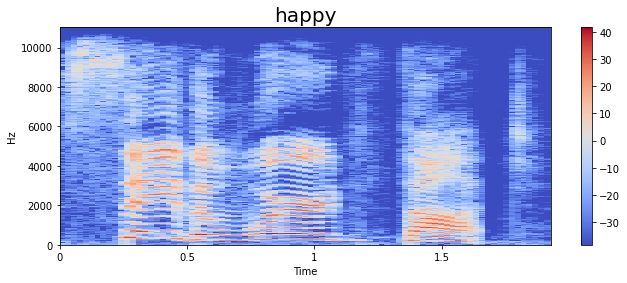

In [25]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [26]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y= y, sr = sr, n_mfcc=40).T, axis = 0)
    return mfcc

In [27]:
extract_mfcc(df['speech'][0])

array([-4.5727200e+02,  7.7138855e+01,  1.0643508e+01,  2.4910293e+00,
        3.9371614e+00,  6.3559276e-01, -1.3109339e+01,  4.2028584e+00,
       -1.9655170e+01, -7.3547726e+00, -2.0759665e+01, -8.3423710e+00,
       -1.0563917e+01,  3.3310530e+00, -1.0269195e+01,  2.1906347e+00,
       -3.2856903e+00,  2.1824276e+00,  2.9857657e+00, -2.7903616e+00,
       -2.2727854e+00,  1.2041223e+01,  8.8378906e+00,  2.6333469e+01,
        2.7806791e+01,  2.9944735e+01,  1.1889820e+01,  1.3601766e+01,
       -2.9215550e-01,  3.2969632e+00,  2.7226706e+00,  4.7591972e+00,
       -1.3671222e+00, -4.3587885e+00, -1.7881670e+00,  4.1436663e+00,
        1.8908811e+00, -1.3613939e+00, -5.2781181e+00, -1.1872951e+00],
      dtype=float32)

In [28]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [29]:
X_mfcc

0       [-457.272, 77.138855, 10.643508, 2.4910293, 3....
1       [-437.31268, 74.31988, 7.1446667, -7.9791994, ...
2       [-429.5787, 82.434326, 27.038866, -11.129218, ...
3       [-434.18063, 86.79906, 8.796568, -16.086382, -...
4       [-490.24356, 96.3113, 18.184713, -15.677985, -...
                              ...                        
2795    [-415.30035, 93.83232, 0.58228874, -4.8451567,...
2796    [-441.69498, 121.20465, 4.695294, -26.377777, ...
2797    [-501.866, 127.96893, -3.572264, -9.309711, 0....
2798    [-431.53384, 88.155945, -2.3733058, -8.63935, ...
2799    [-426.17163, 97.81175, 18.093454, -3.8631642, ...
Name: speech, Length: 2800, dtype: object

In [30]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [31]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [34]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [35]:
y = y.toarray()

In [36]:
y.shape

(2800, 7)

## Create the LSTM Model

In [37]:
from keras import activations
from IPython.core.pylabtools import activate_matplotlib
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
        LSTM(128, return_sequences=False, input_shape = (40,1)),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(7, activation='softmax')
                    
])

model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 77,127
Trainable params: 77,127
Non-traina

In [38]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=512, shuffle=True)

Epoch 1/100
5/5 [==============================] - 9s 865ms/step - loss: 1.8351 - accuracy: 0.2643 - val_loss: 2.5892 - val_accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 3s 548ms/step - loss: 1.6149 - accuracy: 0.4205 - val_loss: 3.0820 - val_accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 3s 565ms/step - loss: 1.4011 - accuracy: 0.5246 - val_loss: 3.6257 - val_accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 2s 484ms/step - loss: 1.1814 - accuracy: 0.6379 - val_loss: 4.2626 - val_accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 2s 496ms/step - loss: 0.9294 - accuracy: 0.7116 - val_loss: 4.8156 - val_accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 2s 473ms/step - loss: 0.6879 - accuracy: 0.7656 - val_loss: 4.9928 - val_accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 3s 550ms/step - loss: 0.5586 - accuracy: 0.7978 - val_loss: 4.8771 - val_accura

## Plot the results

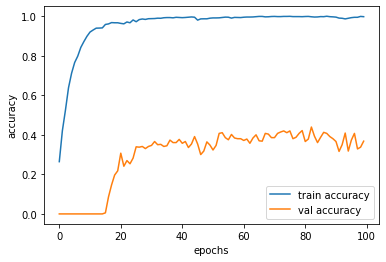

In [39]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

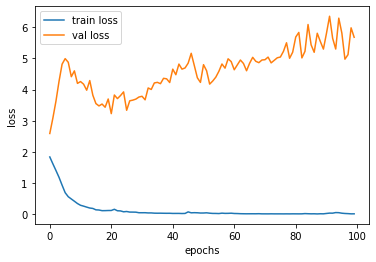

In [40]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
 